When using the scipy minimize method, the calculated m value is: 1.47,
b value is: 0.36, and χ2_N value is: 0.86.


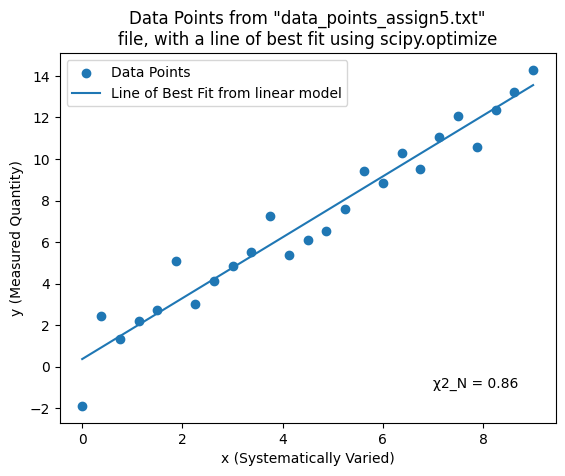

In [9]:
#2a-b
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import math

#for input slope and intercept, return y = mx + b
def linear_model(x,param):
    slope, intercept = param
    result = slope*x + intercept #mx + b
    return result

#reduced chi formula from lecture notes
def reduced_chi(param, *args):
    slope, intercept = param
    x, y_data, uncertainty = args
    y_model = linear_model(x, (slope, intercept))
    residuals = (y_model - y_data)/uncertainty
    chi2 = np.sum( residuals**2/len(y_data) )
    return chi2

#this opens the data file and creates two lists for the "x" and "y" values
data_file = open("data_points_assign5.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
x_List = []
y_List = []
N = len(data_list)-1 #N = amount of data points
i = 0
while (i<N): #while i is less then number of things in data list, keep looping
    components = data_list[i]
    components = components.split("  ") #splitting at every space to seperate x and y components
    x_List.append(components[0]) #making x list corresponding to each data point
    y_List.append(components[1]) #making y list corresponding to each data point
    i = i + 1
x = np.float_(x_List) #converting list of strings to floats
y = np.float_(y_List) #converting list of strings to floats

#this calls the linear_model function to make a line of best fit
slope0, intercept0 = 1.5, 0.5 #initial predictions of slope and intercept
result = scipy.optimize.minimize(reduced_chi,[slope0, intercept0],(x,y,1), method="Nelder-Mead") #optimize method

chi = result.fun #chi = the result of the minimize function
m = result.x[0] #predicted slope from minimize function
b = result.x[1] #predicted y-intercept from minimize function

y_model = linear_model(x, (m, b)) #this uses the predicted slope and y-intercept to generate a line of best fit
print("When using the scipy minimize method, the calculated m value is: %0.2f,"%(m))
print("b value is: %0.2f, and χ2_N value is: %0.2f."%(b,chi))

#this makes figure of data points and line of best fit
plt.figure()
plt.scatter(x,y) #this plots the data points
plt.plot(x,y_model) #this plots the line of best fit
plt.text(7,-1,'χ2_N = %0.2f'%(chi)) #reduced chi^2 value of line of best fit
plt.xlabel('x (Systematically Varied)')
plt.ylabel('y (Measured Quantity)')
plt.title('Data Points from "data_points_assign5.txt"\nfile, with a line of best fit using scipy.optimize')
plt.legend(['Data Points','Line of Best Fit from linear model'])
plt.show()

Above is a graph with all the given data points from the data_points_assign5.txt file (given on D2L), along with a generated line of best fit. This time, unlike in the previous section, we generated this line of best fit with the scipy.optimize.minimize function instead of calculating it through scanning every single possible slope/intercept value and "brute forcing" the line of best fit. As seen by the chi value, this is the exact same result that we achieved before, except in a more efficient manner.

When using the scipy minimize method, the calculated D value is: 2.29 and the b value is: 0.50.



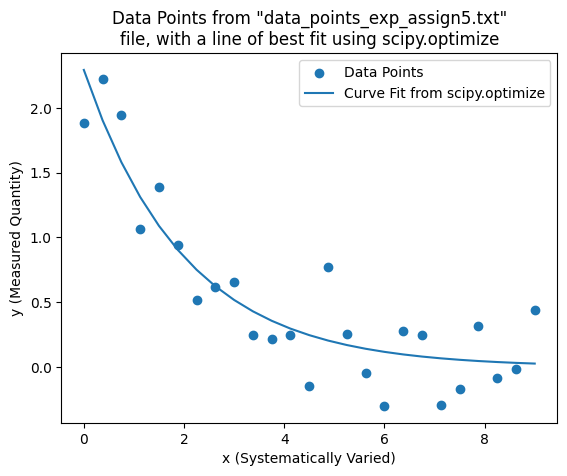

In [10]:
#2c
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import math

#given exponential model formula from lab manual. Input x, D and b and get a y-value returned.
def exponential_model(x,param):
    D, b = param
    result = D*math.e**(-1*b*x)
    return result

#reduced chi formula given in lecture notes.
def reduced_chi(param, *args):
    slope, intercept = param
    x, y_data, uncertainty = args
    y_model = exponential_model(x, (slope, intercept))
    residuals = (y_model - y_data)/uncertainty
    chi2 = np.sum( residuals**2/len(y_data) )
    return chi2

#this opens the data file and creates two lists for the "x" and "y" values
data_file = open("data_points_exp_assign5.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
x_List = []
y_List = []
N = len(data_list)-1 #number of data points in data file
i = 0
while (i<N): #while i is less then number of things in data list, keep looping
    components = data_list[i]
    components = components.split("  ") #splitting at every space to seperate x and y components
    x_List.append(components[0]) #making x list corresponding to each data point
    y_List.append(components[1]) #making y list corresponding to each data point
    i = i + 1
x = np.float_(x_List) #converting list of strings to floats
y = np.float_(y_List) #converting list of strings to floats

d0, b0 = 1.0, 1.0 #setting initial predictions for D and b values

result = scipy.optimize.minimize(reduced_chi,[d0, b0],(x,y,1), method="Nelder-Mead") #optimize method
chi = result.fun #result from minimize function
D = result.x[0] #predicted D value from minimize function
b = result.x[1] #predicted b value from minimize function

y_model = exponential_model(x, (D, b)) #this uses the predicted b and D values to generate a curve fit
print("When using the scipy minimize method, the calculated D value is: %0.2f and the b value is: %0.2f.\n"%(D,b))

#this makes figure of data points and curve fit
plt.figure()
plt.scatter(x,y) #this plots the data points
plt.plot(x,y_model) #this plots curve fit
plt.xlabel('x (Systematically Varied)')
plt.ylabel('y (Measured Quantity)')
plt.title('Data Points from "data_points_exp_assign5.txt"\nfile, with a line of best fit using scipy.optimize')
plt.legend(['Data Points','Curve Fit from scipy.optimize'])
plt.show()

Above is a graph with all the given data points from the data_points_exp_assign5.txt file (given on D2L), along with a generated curve fit. The process for generating this curve-fit is essentially the exact same as the previous graph, with the only major difference including the fact that the function this time was exponential instead of linear.

When using the scipy minimize method, the predicted starting amount of Barium-137 is: 1656.12 counts,
and the calculated half life of decay is: 2.84 minutes.


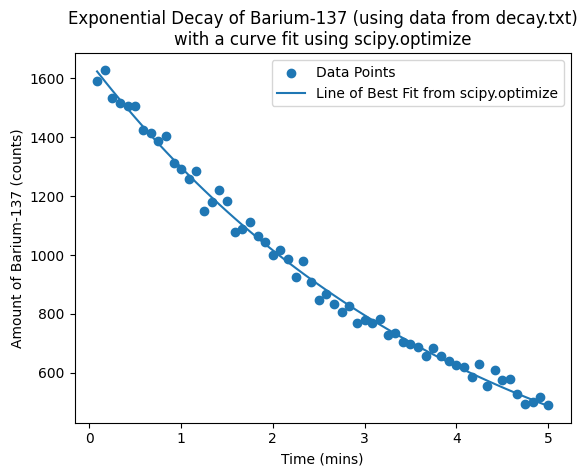

In [11]:
#2d
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

#decay formula given. In a slightly different form then given in the lab manual to avoid exponential ln constant, but it is equivalent.
def decay(t,param):
    Original_Amount, Half_Life = param
    result = Original_Amount * (1/2)**(t/Half_Life)
    return result

#reduced chi formula from above, given in lecture notes
def reduced_chi(param, *args):
    slope, intercept = param
    x, y_data, uncertainty = args
    y_model = decay(x, (slope, intercept))
    residuals = (y_model - y_data)/uncertainty
    chi2 = np.sum( residuals**2/len(y_data) )
    return chi2

#this opens the data file and creates two lists for the "x" and "y" values
data_file = open("decay.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
x_List = []
y_List = []
number = len(data_list)-1 #number of data points
i = 0
while (i<number): #while i is less then number of things in data list, keep looping
    components = data_list[i]
    components = components.split("\t") #splitting at every space to seperate x and y components
    x_List.append(components[0])
    y_List.append(components[1])
    i = i + 1
x = np.float_(x_List) #converting list of strings to floats
y = np.float_(y_List) #converting list of strings to floats

Starting, Half = 1600.0, 2.0 #initial predictions for the starting amount of the substance, and the halflife
result = scipy.optimize.minimize(reduced_chi,[Starting,Half],(x,y,1), method="Nelder-Mead") #optimize function

N = result.x[0] #predicted starting amount from minimize function
halflife = result.x[1] #predicted halflife from minimize function

y_model = decay(x, (N, halflife)) #this uses the predicted starting amount and halflife values along with the decay function to make a curve-fit
print("When using the scipy minimize method, the predicted starting amount of Barium-137 is: %0.2f counts,"%(N))
print("and the calculated half life of decay is: %0.2f minutes."%(halflife))

#this makes figure of data points and line of best fit
plt.figure()
plt.scatter(x,y) #this plots the data points
plt.plot(x,y_model) #this plots the curve fit
plt.xlabel('Time (mins)')
plt.ylabel('Amount of Barium-137 (counts)')
plt.title('Exponential Decay of Barium-137 (using data from decay.txt)\nwith a curve fit using scipy.optimize')
plt.legend(['Data Points','Line of Best Fit from scipy.optimize'])
plt.show()

The calculated half-life for Barium-137 is approximately 2.84 minutes. This seems pretty reasonable qualitatively, as the initial amount of the substance is roughly 1600 counts, and by around 2.75ish minutes, the amount remaining is approximately 800 counts, meaning the half-life would be about 2.75 minutes. This half-life result is also based on the calculated curve, which again qualitatively seems to fit the data very well.

The predicted initial amount of Barium-137 is 1656.12 counts.

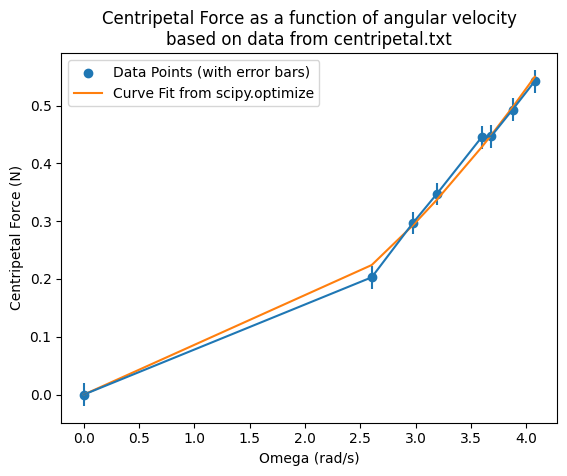

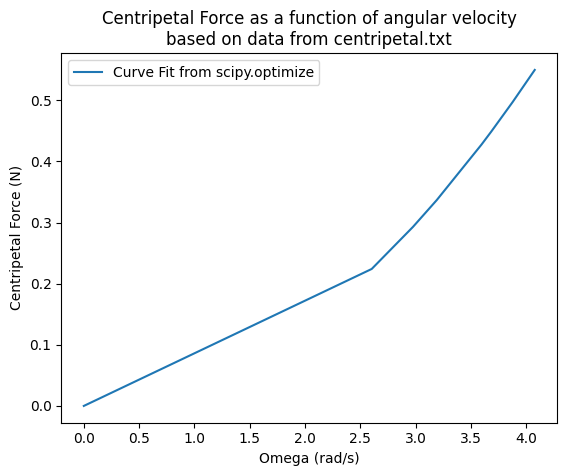

The predicted radius was approximately 0.1694m (16.94cm), and the predicted mass was 0.1952kg (195.25g).
The % difference between the predicted and actual radius is 6.1%, and between the predicted and actual mass is 168.8%.


In [12]:
#2e
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

#centripetal force equation given in the lab manual
def centripetal(omega, mass, radius):
    result = mass * radius * (omega**2)
    return result

#this opens the data file and creates two lists for the "x" and "y" values
data_file = open("centripetal.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
x_List = []
y_List = []
z_List = []
N = len(data_list)-1
i = 0
while (i<N): #while i is less then number of things in data list, keep looping
    components = data_list[i]
    components = components.split("\t") #splitting at every space to seperate x and y components
    x_List.append(components[0])
    y_List.append(components[1])
    z_List.append(components[2])
    i = i + 1

#these pops get rid of titles of the columns in data file, and then order everything properly in the data file. No z_List sort because those are all the same anyways
x_List.pop(0) 
y_List.pop(0)
z_List.pop(0)
x_List.sort()
y_List.sort()
x = np.float_(x_List) #converting list of strings to floats
y = np.float_(y_List) #converting list of strings to floats
yerr = np.float_(z_List) #converting list of strings to floats

#this finds the predicted radius and mass
param, _ = scipy.optimize.curve_fit(centripetal, x, y)

r = param[0] #predicted radius from curve_fit function
m = param[1] #predicted mass from curve_fit function
y_model = centripetal(x, m, r) #this creates a "model" with the predicted radius and mass

#this makes figure of data points and line of best fit
plt.figure()
plt.scatter(x,y) #this plots the data points
plt.errorbar(x,y,yerr) #this plots error bars
plt.plot(x,y_model) #this plots the curve-fit
plt.xlabel('Omega (rad/s)')
plt.ylabel('Centripetal Force (N)')
plt.title('Centripetal Force as a function of angular velocity\nbased on data from centripetal.txt')
plt.legend(['Data Points (with error bars)','Curve Fit from scipy.optimize'])
plt.show()

#this one only graphs the curve-fit
plt.figure()
plt.plot(x,y_model) #this plots the line of best fit
plt.xlabel('Omega (rad/s)')
plt.ylabel('Centripetal Force (N)')
plt.title('Centripetal Force as a function of angular velocity\nbased on data from centripetal.txt')
plt.legend(['Curve Fit from scipy.optimize'])
plt.show()

#this is doing unit conversions and finds percent difference between predicted and actual values
r = param[0]*100
m = param[1]*1000
p_d_r = abs(r-18)/ ((r+18)/2) * 100
p_d_m = abs(r-200)/ ((r+200)/2) * 100
print("The predicted radius was approximately %0.4fm (%0.2fcm), and the predicted mass was %0.4fkg (%0.2fg)."%(param[0],r,param[1],m))
print("The %% difference between the predicted and actual radius is %0.1f%%, and between the predicted and actual mass is %0.1f%%."%(p_d_r,p_d_m))


The figures above show the centripetal force as a function of the angular velocity, based on data from centripetal.txt (given on the D2L). The first figure includes all the data points and error bars directly from the text file, along with the curve fit whereas the second figure only includes the curve fit. 

Based on the combination of the two figures, I would say that yes this data does fit the given centripetal force formula. The shape of the curve fit is that of a stretched quadratic, especially once omega reaches approximately 2.5+ rad/s. The data appears to be linear when omega is between 0-2.5, but that is likely due to the large gap in the data in the original data file. There are no recorded data points inbetween 0-2.5 rad/s. In the first figure, we can see that the curve-fit is either exactly what the data points predicted, or is within the error bars, meaning that the curve-fit (which was created with the centripetal force formula directly) does model the data. If there were more data points (specifically when Omega is between 0-2.5 rad/s), the curve-fit would likely also be improved immensely and would likely be a lot less linear in shape.

The given parameters for the radius and mass of the point-mass (18cm and 200g) are very close to the parameters generated from the curve fit. The curve fit predicted that the radius was about 16.94cm and that the mass was 195.25g. This creates a percent difference of approximately 6.1% for the radius and 2.4% for the mass. Such a low %  difference means that the given parameters are likely consistent with the curve fit. Again, like discussed above, more data points would likely improve the curve-fit considerably and I would expect the % difference to drop.